# Using the Main Deeplay Applications

Deeplay provides you many ready applications. A application os the main Deeplay  object that defines the neural network architecture and training process. This includes the loss, the optimizer, and the training logic.

In [1]:
import deeplay as dl

## Regression

### `Regressor`

The `Regressor` application is used to perform regression tasks. Its default loss is MAE.

In [2]:
net = dl.models.SmallMLP(in_features=10, out_features=1)

model = dl.Regressor(net)

print(model)

Regressor(
  (loss): L1Loss()
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=1, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
  (optimizer): Adam[Adam](lr=0.001)
)


## Classification

There are multiple types of classification tasks. The `Classifier` application is a general one, but there are also specific applications for binary, multiclass and multilabel classification tasks.

### `BinaryClassifier`

In [3]:
net = dl.models.SmallMLP(in_features=10, out_features=1)  # 0 or 1 as output.

model = dl.BinaryClassifier(net)

print(model)

BinaryClassifier(
  (loss): BCELoss()
  (train_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=1, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
  (optimizer): A

### `CategoricalClassifier`

In [4]:
net = dl.models.SmallMLP(in_features=10, out_features=3)

model = dl.CategoricalClassifier(net, num_classes=3)  # Number of classes 
                                                      # matching the number of 
                                                      # output features.

print(model)

CategoricalClassifier(
  (loss): CrossEntropyLoss()
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy(),
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=3, bias=True)
        (activation): Layer[Identity

### `MultiLabelClassifier`

In [5]:
net = dl.models.SmallMLP(in_features=10, out_features=3)

model = dl.MultiLabelClassifier(net)

print(model)

MultiLabelClassifier(
  (loss): BCELoss()
  (train_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=train
  )
  (val_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=val
  )
  (test_metrics): MetricCollection(
    (BinaryAccuracy): BinaryAccuracy(),
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Layer[Linear](in_features=10, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (1): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=32, bias=True)
        (activation): Layer[LeakyReLU](negative_slope=0.05)
        (normalization): Layer[BatchNorm1d](num_features=32)
      )
      (2): LinearBlock(
        (layer): Layer[Linear](in_features=32, out_features=3, bias=True)
        (activation): Layer[Identity]()
      )
    )
  )
  (optimizer

## Controlling the Loss Function

One of the primary functions of specific applications is providing a good default loss function ...

In [6]:
regressor_with_default_loss = dl.Regressor(net).create()

print("Default loss:", regressor_with_default_loss.loss)

Default loss: L1Loss()


... still you might still want to customize the loss.

In [7]:
import torch

regressor_with_custom_loss = dl.Regressor(net, 
                                          loss=torch.nn.MSELoss()
                                          ).create()

print("Custom loss:", regressor_with_custom_loss.loss)

Custom loss: MSELoss()


### Customizing the Loss Function

The loss function does not have to be a torch loss function. You can also define your own loss. The best way is subclassing `torch.nn.Module` and implementing the `forward()` method ...

In [8]:
class MyLossClass(torch.nn.Module):
    """My custom loss class."""
    
    def forward(self, y_pred, y_true):
        """Perform forward pass."""
        return torch.nn.functional.mse_loss(y_pred, y_true) + 1
    
regressor_with_custom_loss_class = dl.Regressor(net, 
                                                loss=MyLossClass()
                                                ).create()

print("Custom loss class:", regressor_with_custom_loss_class.loss)

Custom loss class: MyLossClass()


... but you can also use a function.

In [9]:
def my_loss_fn(y_pred, y_true):
    """Calculate my custom loss."""
    return torch.nn.functional.mse_loss(y_pred, y_true) + 1

regressor_with_custom_loss_fn = dl.Regressor(net, loss=my_loss_fn).create()

print("Custom loss function:", regressor_with_custom_loss_fn.loss)

Custom loss function: <function my_loss_fn at 0x2b81e23e0>


### Overriding the Class Implementation of the Loss Function

In some cases, the application might not provide the desired flexibility. In this case, you can subclass the application and override the `compute_loss()` method.

In [10]:
class MyRegressor(dl.Regressor):
    """My regressor with custom loss function."""
    
    def compute_loss(self, y_hat, y):
        """Compute my custom loss."""
        return torch.nn.functional.mse_loss(y_hat, y) + 1

my_regressor_with_custom_loss = MyRegressor(net).create()

print("Custom loss regressor:", my_regressor_with_custom_loss.loss)             # Benjamin: Should this reflect the change in the loss function?

Custom loss regressor: L1Loss()


## Copntrolling the Optimizer

Deeplay provides some wrappers around the PyTorch optimizers. Their main use is to be able to create the optimizer before the model is built and the parameters are known. Examples of optimizers available in Deeplay are:

In [11]:
adam = dl.Adam(lr=0.01)

print(adam)

Adam[Adam](lr=0.01)


In [12]:
sgd = dl.SGD(lr=0.01, momentum=0.9)

print(sgd)

SGD[SGD](lr=0.01, momentum=0.9)


In [13]:
rmsprop = dl.RMSprop(lr=0.01)

print(rmsprop)

RMSprop[RMSprop](lr=0.01)


Furthermore, Deeplay also supports arbitrary optimizers through the `Optimizer` class.

In [14]:
adagrad = dl.Optimizer(torch.optim.Adagrad, lr=0.01)

print(adagrad)

Optimizer[Adagrad](lr=0.01)


You can assign an optimizer to an application using the `optimizer` parameter.

In [15]:
model = dl.Regressor(net, optimizer=adam).create()

print(model)

Regressor(
  (loss): L1Loss()
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=10, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinearBlock(
        (layer): Linear(in_features=32, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): LinearBlock(
        (layer): Linear(in_features=32, out_features=3, bias=True)
        (activation): Identity()
      )
    )
  )
  (optimizer): Adam[Adam](lr=0.01)
)


### Setting the Optimizer Through Subclassing

For complete control, you can subclass the application and implement the `configure_optimizers` method.  In this case, you should in general use the torch optimizers directly, since the parameters are known at this point in the lifecycle of the application.

In [16]:
class MyRegressor(dl.Regressor):
    """My regressor with custom optimizer."""
    
    def configure_optimizers(self):
        """Configure my custom optimizer."""
        return torch.optim.Adam(self.parameters(), lr=0.01)

net = dl.models.SmallMLP(in_features=10, out_features=1)

model = MyRegressor(net).create()

print(model)

MyRegressor(
  (loss): L1Loss()
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (model): SmallMLP(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=10, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): LinearBlock(
        (layer): Linear(in_features=32, out_features=32, bias=True)
        (activation): LeakyReLU(negative_slope=0.05)
        (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): LinearBlock(
        (layer): Linear(in_features=32, out_features=1, bias=True)
        (activation): Identity()
      )
    )
  )
  (optimizer): Adam[Adam](lr=0.001)
)


## Controlling the Metrics

Most applications support metrics. These can be calculated at a specific point dataset (like the training or validation set) or on all of them. All metrics should be instances of `torchmetrics.Metric`.

You can define the metrics as part of the application ...

In [17]:
import torchmetrics

mse_metric = torchmetrics.regression.MeanSquaredError()
mape_metric = torchmetrics.regression.MeanAbsolutePercentageError()
r2_metric = torchmetrics.regression.R2Score()
var_metric = torchmetrics.regression.ExplainedVariance()

net = dl.models.SmallMLP(in_features=10, out_features=1)

model = dl.Regressor(net,
                     metrics=[mse_metric],  # On train, val and test.
                     train_metrics=[mape_metric],  # On train only.
                     val_metrics=[r2_metric],  # On val only.
                     test_metrics=[var_metric]  # On test only.
                     ).create()

... and see how they are used during training ...

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/py
torch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to
improve performance.

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/py
torch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to
improve performance.

(<Figure size 1500x1000 with 4 Axes>,
 array([[<Axes: title={'center': 'Loss'}, xlabel='Step'>,
         <Axes: title={'center': 'Meansquarederror'}, xlabel='Step'>],
        [<Axes: title={'center': 'R2score'}, xlabel='Step'>,
         <Axes: title={'center': 'Meanabsolutepercentageerror'}, xlabel='Step'>]],
       dtype=object))

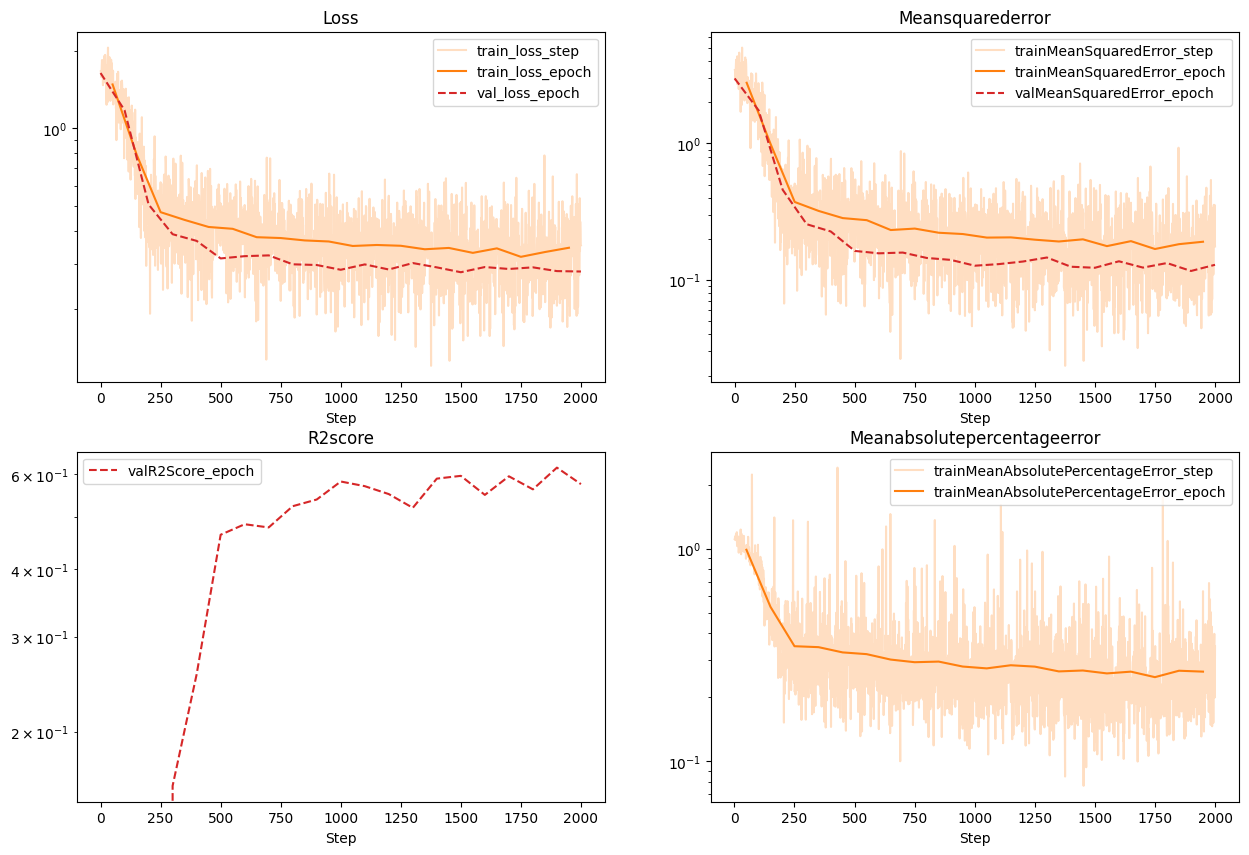

In [18]:
import numpy

x_numpy = numpy.random.randn(1000, 10)  # Input train data.
y_numpy = x_numpy.max(axis=1, keepdims=True)  # Target train data.

x_numpy_val = numpy.random.randn(100, 10)  # Input val data.
y_numpy_val = x_numpy_val.max(axis=1, keepdims=True)  # Target val data.

model.fit(
    (x_numpy, y_numpy), 
    max_epochs=20, 
    batch_size=10, 
    val_data=(x_numpy_val, y_numpy_val), 
    val_batch_size=50,
)
model.trainer.history.plot()

... and during testing using the `Application.text()` method ...

In [19]:
x_numpy_test = numpy.random.randn(100, 10)  # Input test data.
y_numpy_test = x_numpy_val.max(axis=1, keepdims=True)  # Target test data.

test_results = model.test((x_numpy_test, y_numpy_test))
print(f"Test results: {test_results}\n")                                        # Benjamin: Should this also work? If not, why not?

Output()

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:492: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Test metric         ┃        DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testExplainedVariance_epoch │     -0.6495755910873413     │
│ testMeanSquaredError_epoch  │     0.5026346445083618      │
│       test_loss_epoch       │      0.556201696395874      │
└─────────────────────────────┴─────────────────────────────┘

Test results: {'test_loss_epoch': 0.556201696395874, 'testMeanSquaredError_epoch': 0.5026346445083618, 'testExplainedVariance_epoch': -0.6495755910873413}



... or the data loaders.

In [20]:
x_numpy_test = numpy.random.randn(100, 10)  # Input test data.
y_numpy_test = x_numpy_val.max(axis=1, keepdims=True)  # Target test data.

x_torch_test = torch.from_numpy(x_numpy_test).float()
y_torch_test = torch.from_numpy(y_numpy_test).float()

test_dataset = torch.utils.data.TensorDataset(x_torch_test, y_torch_test)

test_dataloader = dl.DataLoader(test_dataset, batch_size=10)

model.trainer.test(dataloaders=test_dataloader)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Test metric         ┃        DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ testExplainedVariance_epoch │     -0.5688254833221436     │
│ testMeanSquaredError_epoch  │     0.47966980934143066     │
│       test_loss_epoch       │     0.5660138726234436      │
└─────────────────────────────┴─────────────────────────────┘

/Users/giovannivolpe/Documents/GitHub/DeepLearningCrashCourse/py_env_dlcc/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


[{'test_loss_epoch': 0.5660138726234436,
  'testMeanSquaredError_epoch': 0.47966980934143066,
  'testExplainedVariance_epoch': -0.5688254833221436}]

## Understanding the Training History Object

The training history is stored in the `trainer.history` object. This is a dictionary containing the training and validation metrics for each epoch, and the training metrics for each step.

In [21]:
h = model.trainer.history

print(h.history.keys())  # Training and validation metrics at each epoch.

print(h.step_history.keys())  # Training (no validation!) metrics at each step.

dict_keys(['val_loss_epoch', 'valMeanSquaredError_epoch', 'valR2Score_epoch', 'train_loss_epoch', 'trainMeanSquaredError_epoch', 'trainMeanAbsolutePercentageError_epoch'])
dict_keys(['train_loss_step', 'trainMeanSquaredError_step', 'trainMeanAbsolutePercentageError_step'])


You can easily access the values of these metrics ...

In [22]:
print(h.history["trainMeanSquaredError_epoch"]["value"])
print(h.history["trainMeanSquaredError_epoch"]["step"])
print(h.history["trainMeanSquaredError_epoch"]["epoch"])

[2.7773854732513428, 0.9855316281318665, 0.3725496828556061, 0.3202712833881378, 0.28395387530326843, 0.2741950452327728, 0.232207790017128, 0.23795974254608154, 0.2218320369720459, 0.21705880761146545, 0.20444029569625854, 0.205173522233963, 0.19734065234661102, 0.19144751131534576, 0.19857028126716614, 0.17706595361232758, 0.1925824135541916, 0.16866059601306915, 0.18302398920059204, 0.19064973294734955]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


## Saving and loading models

The best way to save a model is currently to save the state dict.

**Note:** In the future, Deeplay might have a way to save the entire architecture through the config file, but that is not yet implemented.

In [23]:
torch.save(model.state_dict(), "model.pth")  # Saving.
model.load_state_dict(torch.load("model.pth"))  # Loading.

<All keys matched successfully>

## Using Callbacks

Deeplay supports PyTorch Lightning callbacks. These can be used to implement custom behavior during training. As an example, you can use a `EarlyStopping` callback and a `ModelCheckpoint` callback as examples

**Note:** Refer to the Lightning documentation for more information on the available callbacks and how to implement your own.

In [24]:
import lightning.pytorch.callbacks as callbacks

early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=1)
checkpoint = callbacks.ModelCheckpoint(monitor="val_loss", save_top_k=1)

net = dl.models.SmallMLP(in_features=10, out_features=1)

model = dl.Regressor(net).create()

model.fit(
    (x_numpy, y_numpy), 
    max_epochs=20, 
    batch_size=10, 
    val_data=(x_numpy_val, y_numpy_val), 
    val_batch_size=50, 
    callbacks=[early_stopping, checkpoint],
)

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ L1Loss           │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ model         │ SmallMLP         │  1.6 K │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 1.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.6 K                                                                                                
Total estimated model params size (MB): 0

Output()

# Models

Models are typically complete neural networks that do not need any further customization. They can be used directly in the applications. There are some exceptions. For example, the `backbone` models usually need a head to be useful.

Let's look at some of the models available in Deeplay.

## Available models

### ResNet18

The ResNet18 is available as a backbone.

In [25]:
resnet18 = dl.models.BackboneResnet18(in_channels=3, pool_output=True)
print(resnet18)

BackboneResnet18(
  (blocks): LayerList(
    (0): Conv2dBlock(
      (layer): Layer[Conv2d](in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3, bias=False)
      (normalization): Layer[BatchNorm2d](num_features=64)
      (activation): Layer[ReLU](inplace=True)
      (pool): Layer[MaxPool2d](kernel_size=3, stride=2, padding=1, ceil_mode=False, dilation=1)
    )
    (1): Conv2dBlock(
      (blocks): Sequential(
        (0-1): 2 x Conv2dBlock(
          (shortcut_start): Conv2dBlock(
            (layer): Layer[Identity](in_channels=64, out_channels=64, kernel_size=1, stride=1, padding=0)
            (activation): Layer[Identity]()
          )
          (blocks): Sequential(
            (0): Conv2dBlock(
              (layer): Layer[Conv2d](in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
              (normalization): Layer[BatchNorm2d](num_features=64)
              (activation): Layer[ReLU]()
            )
            (1): Conv2dBlock(
              (

### DCGAN generator and discriminator

In [26]:
generator = dl.models.DCGANGenerator(out_channels=3)
discriminator = dl.models.DCGANDiscriminator(in_channels=3)

print(generator)
print(discriminator)

DCGANGenerator(
  (blocks): LayerList(
    (0): Conv2dBlock(
      (layer): Layer[ConvTranspose2d](in_channels=100, out_channels=1024, kernel_size=4, stride=1, padding=0)
      (activation): Layer[ReLU]()
      (normalization): Layer[BatchNorm2d](num_features=1024)
    )
    (1): Conv2dBlock(
      (layer): Layer[ConvTranspose2d](in_channels=1024, out_channels=512, kernel_size=4, stride=2, padding=1)
      (activation): Layer[ReLU]()
      (normalization): Layer[BatchNorm2d](num_features=512)
    )
    (2): Conv2dBlock(
      (layer): Layer[ConvTranspose2d](in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=1)
      (activation): Layer[ReLU]()
      (normalization): Layer[BatchNorm2d](num_features=256)
    )
    (3): Conv2dBlock(
      (layer): Layer[ConvTranspose2d](in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1)
      (activation): Layer[ReLU]()
      (normalization): Layer[BatchNorm2d](num_features=128)
    )
    (4): Conv2dBlock(
      (layer

### CycleGAN generator and discriminator

In [27]:
generator = dl.models.CycleGANResnetGenerator(in_channels=3, out_channels=3)
discriminator = dl.models.CycleGANDiscriminator(in_channels=3)

print(generator)
print(discriminator)

CycleGANResnetGenerator(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (reflectionpad2d): Layer[ReflectionPad2d](padding=3)
        (layer): Layer[Conv2d](in_channels=3, out_channels=64, kernel_size=7, stride=1, padding=0)
        (normalization): Layer[InstanceNorm2d](num_features=64)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1)
        (normalization): Layer[InstanceNorm2d](num_features=128)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1)
        (normalization): Layer[InstanceNorm2d](num_features=256)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0-8): 9 x Conv2dBlock(
      

### MultiLayerPerceptrons

In [28]:
small = dl.models.SmallMLP(in_features=10, out_features=1).create()
medium = dl.models.MediumMLP(in_features=10, out_features=1).create()
large = dl.models.LargeMLP(in_features=10, out_features=1).create()
xlarge = dl.models.XLargeMLP(in_features=10, out_features=1).create()

print(small)
print(medium)
print(large)
print(xlarge)

SmallMLP(
  (blocks): LayerList(
    (0): LinearBlock(
      (layer): Linear(in_features=10, out_features=32, bias=True)
      (activation): LeakyReLU(negative_slope=0.05)
      (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinearBlock(
      (layer): Linear(in_features=32, out_features=32, bias=True)
      (activation): LeakyReLU(negative_slope=0.05)
      (normalization): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinearBlock(
      (layer): Linear(in_features=32, out_features=1, bias=True)
      (activation): Identity()
    )
  )
)
MediumMLP(
  (blocks): LayerList(
    (0): LinearBlock(
      (layer): Linear(in_features=10, out_features=64, bias=True)
      (activation): LeakyReLU(negative_slope=0.05)
      (normalization): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinearBlock(
      (layer): Linear(in_features=64,

### Recurrent neural network

TODO: we should implement specific models. The is more like a base

In [29]:
rnn = dl.models.RecurrentModel(in_features=10, 
                               hidden_features=[256, 256], 
                               out_features=1,
                               return_cell_state=True,
                               rnn_type="LSTM",
                               out_activation=torch.nn.Sigmoid,
                               bidirectional=False,
                               batch_first=True,
                               embedding=torch.nn.Embedding(num_embeddings=10, embedding_dim=10)).create()
rnn

RecurrentModel(
  (embedding): Embedding(10, 10)
  (embedding_dropout): Dropout(p=0, inplace=False)
  (blocks): LayerList(
    (0): Sequence1dBlock(
      (layer): LSTM(10, 256, batch_first=True)
    )
    (1): Sequence1dBlock(
      (layer): LSTM(256, 256, batch_first=True)
    )
  )
  (head): MultiLayerPerceptron(
    (blocks): LayerList(
      (0): LinearBlock(
        (layer): Linear(in_features=256, out_features=1, bias=True)
        (activation): Sigmoid()
      )
    )
  )
)

### VisionTransformer

TODO: we should implement specific models. The is more like a base

In [30]:
transformer = dl.models.ViT(in_channels=3, image_size=256, patch_size=8, hidden_features=[128, 128], num_heads=8, out_features=1).create()
transformer

ViT(
  (patch_embedder): Patchify(
    (layer): Conv2d(3, 128, kernel_size=(8, 8), stride=(8, 8))
    (dropout): Dropout(p=0, inplace=False)
  )
  (positional_embedder): PositionalEmbedding(
    (dropout): Dropout(p=0, inplace=False)
  )
  (transformer_encoder): TransformerEncoderLayer(
    (blocks): LayerList(
      (0-1): 2 x SequentialBlock(
        (multihead): LayerDropoutSkipNormalization(
          (normalization): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (layer): MultiheadSelfAttention(
            (projection): Identity()
            (attention): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
            )
          )
          (dropout): Dropout(p=0, inplace=False)
          (skip): Add()
        )
        (feed_forward): LayerDropoutSkipNormalization(
          (normalization): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (layer): MultiLayerPerceptron(
     

## Making your own model from components

Typically, you'll want to make your own model using Sequential:

In [31]:
import deeplay as dl
import torch
model = dl.Sequential(
    dl.models.BackboneResnet18(in_channels=3, pool_output=True),
    dl.models.SmallMLP(in_features=512, out_features=1)
)
print(model)

Sequential(
  (0): BackboneResnet18(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3, bias=False)
        (normalization): Layer[BatchNorm2d](num_features=64)
        (activation): Layer[ReLU](inplace=True)
        (pool): Layer[MaxPool2d](kernel_size=3, stride=2, padding=1, ceil_mode=False, dilation=1)
      )
      (1): Conv2dBlock(
        (blocks): Sequential(
          (0-1): 2 x Conv2dBlock(
            (shortcut_start): Conv2dBlock(
              (layer): Layer[Identity](in_channels=64, out_channels=64, kernel_size=1, stride=1, padding=0)
              (activation): Layer[Identity]()
            )
            (blocks): Sequential(
              (0): Conv2dBlock(
                (layer): Layer[Conv2d](in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
                (normalization): Layer[BatchNorm2d](num_features=64)
                (activation): Layer[ReLU]()
  

In [32]:
model = dl.Sequential(
    dl.ConvolutionalEncoder2d(3, [16, 32, 64], 128),
    torch.nn.AdaptiveAvgPool2d((1, 1)),
    dl.MultiLayerPerceptron(128, [], 1)
)
model[..., "activation"].isinstance(torch.nn.ReLU).configure(torch.nn.LeakyReLU, negative_slope=0.2)
model

Sequential(
  (0): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[LeakyReLU](negative_slope=0.2)
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[LeakyReLU](negative_slope=0.2)
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        (activation): Layer[LeakyReLU](negative_slope=0.2)
      )
      (3): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        (activation): Layer[Identity]()
      )
    )
    (po

### Making a model by subclassing

A model is just a `DeeplayModule` sublass like any other. For some applications, it might be more convenient to subclass the model and implement the forward method.

In [33]:
class MyModel(dl.DeeplayModule):

    def __init__(self):
        self.backbone = dl.ConvolutionalEncoder2d(3, [16, 32, 64], 128)
        self.regression_head = dl.models.SmallMLP(in_features=128, out_features=1)
        self.classification_head = dl.models.SmallMLP(in_features=128, out_features=10)

    def forward(self, x):
        x = self.backbone(x)
        reg = self.regression_head(x)
        cls = self.classification_head(x)
        return reg, cls
    
model = MyModel().create()
model

MyModel(
  (backbone): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
    (postprocess): Identity()
  )
  (regression_head): SmallMLP(
    

## Weight initialization

Deeplay provides some weight initialization methods. These can be used before or after the model is built.

In [34]:
backbone = dl.ConvolutionalEncoder2d(3, [16, 32, 64], 128)

initializer = dl.initializers.Normal(mean=1, std=1.0)
backbone.initialize(initializer)
backbone.build()

backbone.blocks[0].layer.weight.mean(), backbone.blocks[0].layer.weight.std()

(tensor(0.9930, grad_fn=<MeanBackward0>),
 tensor(0.9765, grad_fn=<StdBackward0>))

In [35]:
# After build
backbone = dl.ConvolutionalEncoder2d(3, [16, 32, 64], 128)

initializer = dl.initializers.Normal(mean=1, std=1.0)
backbone.build()
backbone.initialize(initializer)


backbone.blocks[0].layer.weight.mean(), backbone.blocks[0].layer.weight.std()

(tensor(1.0316, grad_fn=<MeanBackward0>),
 tensor(1.0261, grad_fn=<StdBackward0>))

### Conditional weight initialization

It's also possible to conditionally initialize the weights. This can be useful if you want to use different initialization methods for different parts of the model.

There are two ways to do this. The first is to set the `targets` parameter of the initializer, which should be a tuple of module types that should be initialized. The second way is to use the selector syntax.

In [36]:
# Using `target`

backbone = dl.ConvolutionalEncoder2d(3, [16, 32, 64], 128)
backbone.normalized() # We add normalization, which we want to initialize differently

conv_initializer = dl.initializers.Normal(mean=0, std=1.0, targets=(torch.nn.Conv2d,))
norm_initializer = dl.initializers.Constant(weight=1, bias=0, targets=(torch.nn.BatchNorm2d,))
backbone.initialize(conv_initializer)
backbone.initialize(norm_initializer)
backbone.build()

print("Conv2d", backbone.blocks[0].layer.weight.mean(), backbone.blocks[0].layer.weight.std())
print("BatchNorm2d", backbone.blocks[0].normalization.weight.mean(), backbone.blocks[0].normalization.weight.std())


Conv2d tensor(0.0720, grad_fn=<MeanBackward0>) tensor(0.9344, grad_fn=<StdBackward0>)
BatchNorm2d tensor(1., grad_fn=<MeanBackward0>) tensor(0., grad_fn=<StdBackward0>)


In [37]:
# Using selectors

backbone = dl.ConvolutionalEncoder2d(3, [16, 32, 64], 128)
backbone.normalized() # We add normalization, which we want to initialize differently

conv_initializer = dl.initializers.Normal(mean=0, std=1)
norm_initializer = dl.initializers.Constant(weight=1, bias=0)

backbone[..., "layer"].all.initialize(conv_initializer)
backbone[..., "normalization"].all.initialize(norm_initializer)
backbone.build()

print("Conv2d", backbone.blocks[0].layer.weight.mean(), backbone.blocks[0].layer.weight.std())
print("BatchNorm2d", backbone.blocks[0].normalization.weight.mean(), backbone.blocks[0].normalization.weight.std())

Conv2d tensor(-0.1058, grad_fn=<MeanBackward0>) tensor(1.0607, grad_fn=<StdBackward0>)
BatchNorm2d tensor(1., grad_fn=<MeanBackward0>) tensor(0., grad_fn=<StdBackward0>)
